In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from nltk.sentiment import SentimentIntensityAnalyzer

### Load data

In [2]:
df = pd.read_csv('data/complete_data.csv')
df.index = pd.to_datetime(df['datetime'])

### Sentiment analysis

In [3]:

tokenized = df['webTitle'].apply(sent_tokenize)

# Tokenize the headlines
tokenized = tokenized.apply(lambda x: [word_tokenize(s) for s in x])

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokenized = tokenized.apply(lambda x: [[w for w in s if w.lower() not in stop_words] for s in x][0])

# sentiment analysis

sia = SentimentIntensityAnalyzer()

sentiments = tokenized.apply(lambda x: [sia.polarity_scores(s) for s in x])
sentiments = sentiments.apply(lambda x: [s['compound'] for s in x])

# add sentikent to df
df['sentiment'] = sentiments.apply(sum)
display(df)

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,isHosted,pillarId,pillarName,datetime,sentiment
datetime,,,,,,,,,,,,,
2023-12-31 07:00:56+00:00,business/2023/dec/31/smiles-all-round-as-finan...,article,business,Business,2023-12-31T07:00:56Z,Smiles all round as financial markets end 2023...,https://www.theguardian.com/business/2023/dec/...,https://content.guardianapis.com/business/2023...,False,pillar/news,News,2023-12-31 07:00:56+00:00,0.4767
2023-12-28 16:02:15+00:00,business/live/2023/dec/28/pound-dollar-uk-econ...,liveblog,business,Business,2023-12-28T16:02:15Z,"UK dealmaking shrinks in 2023, but economy pre...",https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-12-28 16:02:15+00:00,0.0000
2023-12-27 16:17:09+00:00,business/live/2023/dec/27/stock-markets-santa-...,liveblog,business,Business,2023-12-27T16:17:09Z,New York Times accuses ChatGPT maker OpenAI an...,https://www.theguardian.com/business/live/2023...,https://content.guardianapis.com/business/live...,False,pillar/news,News,2023-12-27 16:17:09+00:00,-0.8167
2023-12-27 09:00:02+00:00,global-development/2023/dec/27/uruguays-green-...,article,global-development,Global development,2023-12-27T09:00:02Z,Uruguay’s green power revolution: rapid shift ...,https://www.theguardian.com/global-development...,https://content.guardianapis.com/global-develo...,False,pillar/news,News,2023-12-27 09:00:02+00:00,0.0000
2023-12-24 04:22:30+00:00,world/2023/dec/24/us-says-it-shot-down-four-dr...,article,world,World news,2023-12-24T04:22:30Z,US says it shot down four drones in southern R...,https://www.theguardian.com/world/2023/dec/24/...,https://content.guardianapis.com/world/2023/de...,False,pillar/news,News,2023-12-24 04:22:30+00:00,0.1280
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-01-14 17:13:00+00:00,business/2004/jan/14/usnews.money,article,business,Business,2004-01-14T17:13:00Z,US exports exceed expectation,https://www.theguardian.com/business/2004/jan/...,https://content.guardianapis.com/business/2004...,False,pillar/news,News,2004-01-14 17:13:00+00:00,0.0000
2004-01-10 02:12:56+00:00,money/2004/jan/10/business.usnews,article,money,Money,2004-01-10T02:12:56Z,Dollar trades at record low,https://www.theguardian.com/money/2004/jan/10/...,https://content.guardianapis.com/money/2004/ja...,False,pillar/lifestyle,Lifestyle,2004-01-10 02:12:56+00:00,-0.2732
2004-01-10 02:12:55+00:00,business/2004/jan/10/oilandpetrol.news,article,business,Business,2004-01-10T02:12:55Z,Sir Philip ducks out as Shell cuts reserves,https://www.theguardian.com/business/2004/jan/...,https://content.guardianapis.com/business/2004...,False,pillar/news,News,2004-01-10 02:12:55+00:00,-0.2960


type
['article' 'liveblog' 'interactive' 'video' 'gallery' 'picture' 'audio']
sectionId
['business' 'global-development' 'world' 'tv-and-radio' 'commentisfree'
 'us-news' 'environment' 'australia-news' 'stage' 'fashion' 'uk-news'
 'books' 'money' 'artanddesign' 'sport' 'lifeandstyle' 'politics' 'film'
 'culture' 'football' 'travel' 'technology' 'news' 'society' 'music'
 'science' 'education' 'games' 'global' 'food' 'careers' 'cities'
 'theobserver' 'sustainable-business' 'media' 'public-leaders-network'
 'working-in-development' 'global-development-professionals-network'
 'theguardian' 'big-energy-debate' 'culture-professionals-network' 'law'
 'crosswords' 'childrens-books-site' 'globalcleantech100' 'katine']


<Axes: ylabel='Frequency'>

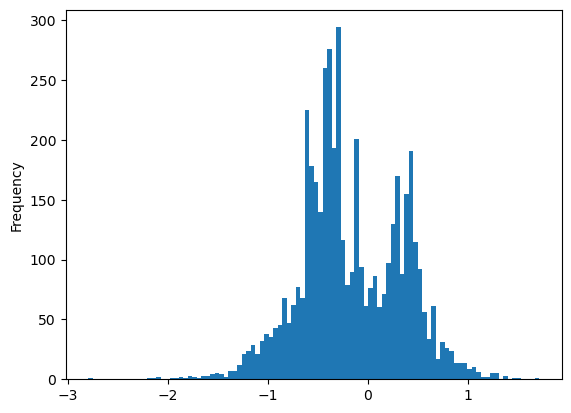

In [4]:
for column in ['type', 'sectionId']:
    print(column)
    print(df[column].unique())

df['sentiment'][df['sentiment'] != 0].plot(kind='hist', bins=100)


In [5]:

df_sent = pd.DataFrame(df['sentiment'].resample('D').mean().fillna(0))

df_sent.index = df_sent.index.strftime('%Y-%m-%d')

# get stock data
stock_data = yf.download('CL=F', period='21Y', ignore_tz=True)[['Adj Close']]
stock_data.index = stock_data.index.strftime('%Y-%m-%d')
stock_data['log_ret'] = np.log(stock_data).diff()

data = stock_data.join(df_sent,  how='outer')
# drop all rows where sentiment is NaN
data = data.dropna(subset=['sentiment'])
# forward fill adj close 
data['Adj Close'] = data['Adj Close'].ffill()


display(data)



[*********************100%%**********************]  1 of 1 completed


c:\Users\joneh\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\joneh\AppData\Local\Temp\ipykernel_23732\1875425857.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['log_ret'] = np.log(stock_data).diff()


,Adj Close,log_ret,sentiment
2004-01-02,NaN,NaN,0.20230
2004-01-03,NaN,NaN,0.00000
2004-01-04,NaN,NaN,0.00000
2004-01-05,33.779999,0.038014,0.00000
2004-01-06,33.700001,-0.002371,0.00000
...,...,...,...
2023-12-27,74.110001,-0.019509,-0.40835
2023-12-28,71.769997,-0.032084,0.00000
2023-12-29,71.650002,-0.001673,0.00000
2023-12-30,71.650002,NaN,0.00000


,Adj Close,sentiment,log_ret
Adj Close,1.000000,-0.184004,0.004355
sentiment,-0.184004,1.000000,0.012617
log_ret,0.004355,0.012617,1.000000


<Axes: xlabel='log_ret', ylabel='sentiment'>

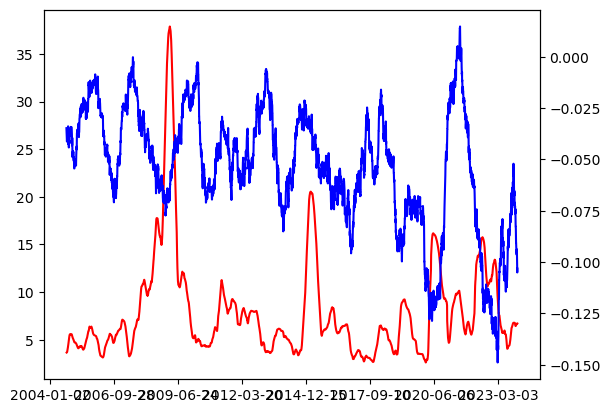

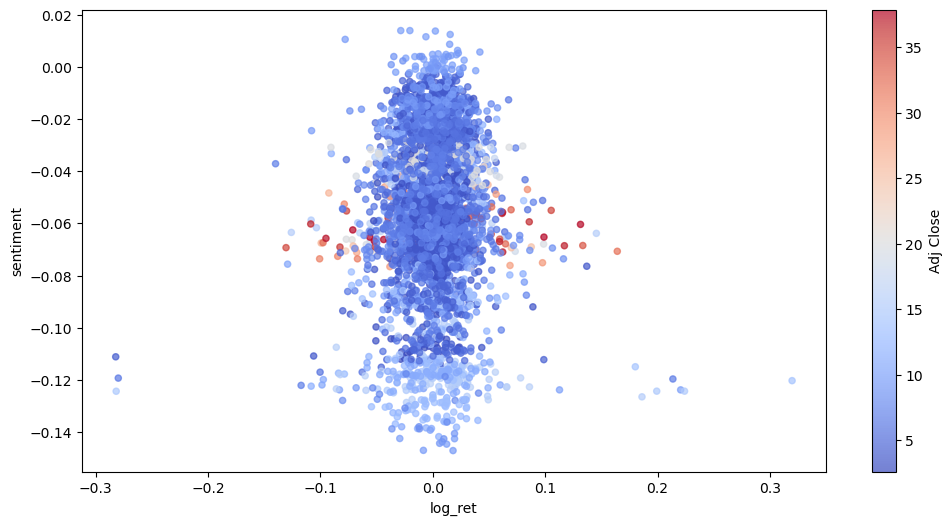

In [6]:
from scipy.stats import pearsonr

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

data['Adj Close'].rolling(252).std().plot(ax=ax1, color='r')
data['sentiment'].rolling(252).mean().plot(ax=ax2, color='b')

vol = pd.concat([
    data['Adj Close'].rolling(252).std(), 
    data['sentiment'].rolling(252).mean(),
    data['log_ret']
    ], axis=1)

vol.dropna(inplace=True)

display(vol.corr())

# get p-value

pearsonr(vol['Adj Close'], vol['sentiment'])

vol.plot(kind='scatter', x='log_ret', y='sentiment', c='Adj Close', cmap='coolwarm', alpha=0.7, figsize=(12, 6))
